In [1]:
# Importing the required libraries 

import numpy as np      # for numerical computations 
import pandas as pd     # for creating and manipulating dataframes
# import csv             
from scipy import stats   # for statistical operations on data

from sklearn.decomposition import PCA     # to analyse and reduce the dimension of the data

# Visualisation libraries
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots   

# Machine learning tools and models from sklearn 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


# model_slection by trying all values using sklearn's gridsearch
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef


Since the highest number in the data is 5523 and the data size is large, that is to save unnecessary resource consumption, values are represented by using 16 bytes.

In [ ]:
df = pd.read_csv("../Dataset/covtype.csv")  #5523 is the highest value so 16 bytes is enough to represent it
df

Creating a list to assign dataframe columns with proper names

![Dataset details](../pictures/copy_data.png)

In [3]:
#Column names of the first 14 columns
column_names = ['elevation', 'aspect', 'slope',
                'horizontal_distance_to_hydrology',
                'vertical_distance_to_hydrology',
                'horizontal_distance_to_roadways',
                'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
                'horizontal_distance_to_fire_points', 'wilderness_area1',
                'wilderness_area2', 'wilderness_area3','wilderness_area4']

# adding the 40 soil types column names that are binary
for i in range(1,41):
    column_names.append(f"soil_type{i}")

# adding the final target columns
column_names.append("cover_type")

print(column_names)

['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 'vertical_distance_to_hydrology', 'horizontal_distance_to_roadways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm', 'horizontal_distance_to_fire_points', 'wilderness_area1', 'wilderness_area2', 'wilderness_area3', 'wilderness_area4', 'soil_type1', 'soil_type2', 'soil_type3', 'soil_type4', 'soil_type5', 'soil_type6', 'soil_type7', 'soil_type8', 'soil_type9', 'soil_type10', 'soil_type11', 'soil_type12', 'soil_type13', 'soil_type14', 'soil_type15', 'soil_type16', 'soil_type17', 'soil_type18', 'soil_type19', 'soil_type20', 'soil_type21', 'soil_type22', 'soil_type23', 'soil_type24', 'soil_type25', 'soil_type26', 'soil_type27', 'soil_type28', 'soil_type29', 'soil_type30', 'soil_type31', 'soil_type32', 'soil_type33', 'soil_type34', 'soil_type35', 'soil_type36', 'soil_type37', 'soil_type38', 'soil_type39', 'soil_type40', 'cover_type']


In [ ]:
df.columns = column_names     # replacing column names with proper names according to the details 
df

In [5]:
original_length = len(df)
original_length

581011

In [6]:
df.describe()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581011 entries, 0 to 581010
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   elevation                           581011 non-null  int64
 1   aspect                              581011 non-null  int64
 2   slope                               581011 non-null  int64
 3   horizontal_distance_to_hydrology    581011 non-null  int64
 4   vertical_distance_to_hydrology      581011 non-null  int64
 5   horizontal_distance_to_roadways     581011 non-null  int64
 6   hillshade_9am                       581011 non-null  int64
 7   hillshade_noon                      581011 non-null  int64
 8   hillshade_3pm                       581011 non-null  int64
 9   horizontal_distance_to_fire_points  581011 non-null  int64
 10  wilderness_area1                    581011 non-null  int64
 11  wilderness_area2                    581011 non-null 

# 1. Preprocessing

### Dropping all rows with missing values

In [8]:
df = df.dropna()
len_after_na_drop = len(df)
print(f"The number of raws with missing values that have been dropped is {len_after_na_drop-original_length}")  # there should be none as the dataset obtained mentions that it has none

The number of raws with missing values that have been dropped is 0


Some  of the columns are numerical and have continuous values with quantitative meaning.

=> Extracting the quantitative columns, that have continuously values.

In [ ]:
# Extracting the quantiative columns, which are the first 10 columns
quantitative_columns = column_names[:10]   # the names of the columns are the numbers ranging from 0 to 54 in this project
print("The quantiative/continous columns are: ", quantitative_columns,'\n\nThe dataframe created from those columns is:')

# Creating a dataframe of the quantiative columns only
quantitative_columns_df = df[quantitative_columns]
quantitative_columns_df

Eventhough all the columns are numeric, some of them are **categorical** and need not be normalised. 

=> Extracting the categorical columns.

In [ ]:
# Extracting the categorical columns, which are the columns from index 10 - 54 of the column names list
categorical_columns = column_names[10:54]
print("The Categorical columns are: ", categorical_columns,'\n\nThe dataframe created from those columns is:')

# Creating a dataframe of the categorical columns only
categorical_columns_df = df[categorical_columns]   # creating a categorical dataframe
categorical_columns_df

Once the quantiative columns have been extracted, we can normalise the dataframe of the quantiative columns. It would meaning meaningless to normalise the categorical columns.

In [11]:
# Normalizing the quantitative columns and storing them in a new dataframe, quantitative_normalised_columns_df
quantitative_normalised_columns_df = stats.zscore(quantitative_columns_df)

# Updating the original dataframe with the normalised quantiative columns
for i in quantitative_columns:
    df[i] = quantitative_normalised_columns_df[i]

Creating a copy of the normalised df as new_df. All manipulations will be conducted on this new_df, the original df will be used as a reference.

In [ ]:
new_df = df.copy()     # a copy of the original dataframe
new_df

### Checking for outliers

Inspection of outliers will only be conducted on teh **quantiative columns** as the rest categorical columns are binary.

In [13]:
quantitative_columns

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'vertical_distance_to_hydrology',
 'horizontal_distance_to_roadways',
 'hillshade_9am',
 'hillshade_noon',
 'hillshade_3pm',
 'horizontal_distance_to_fire_points']

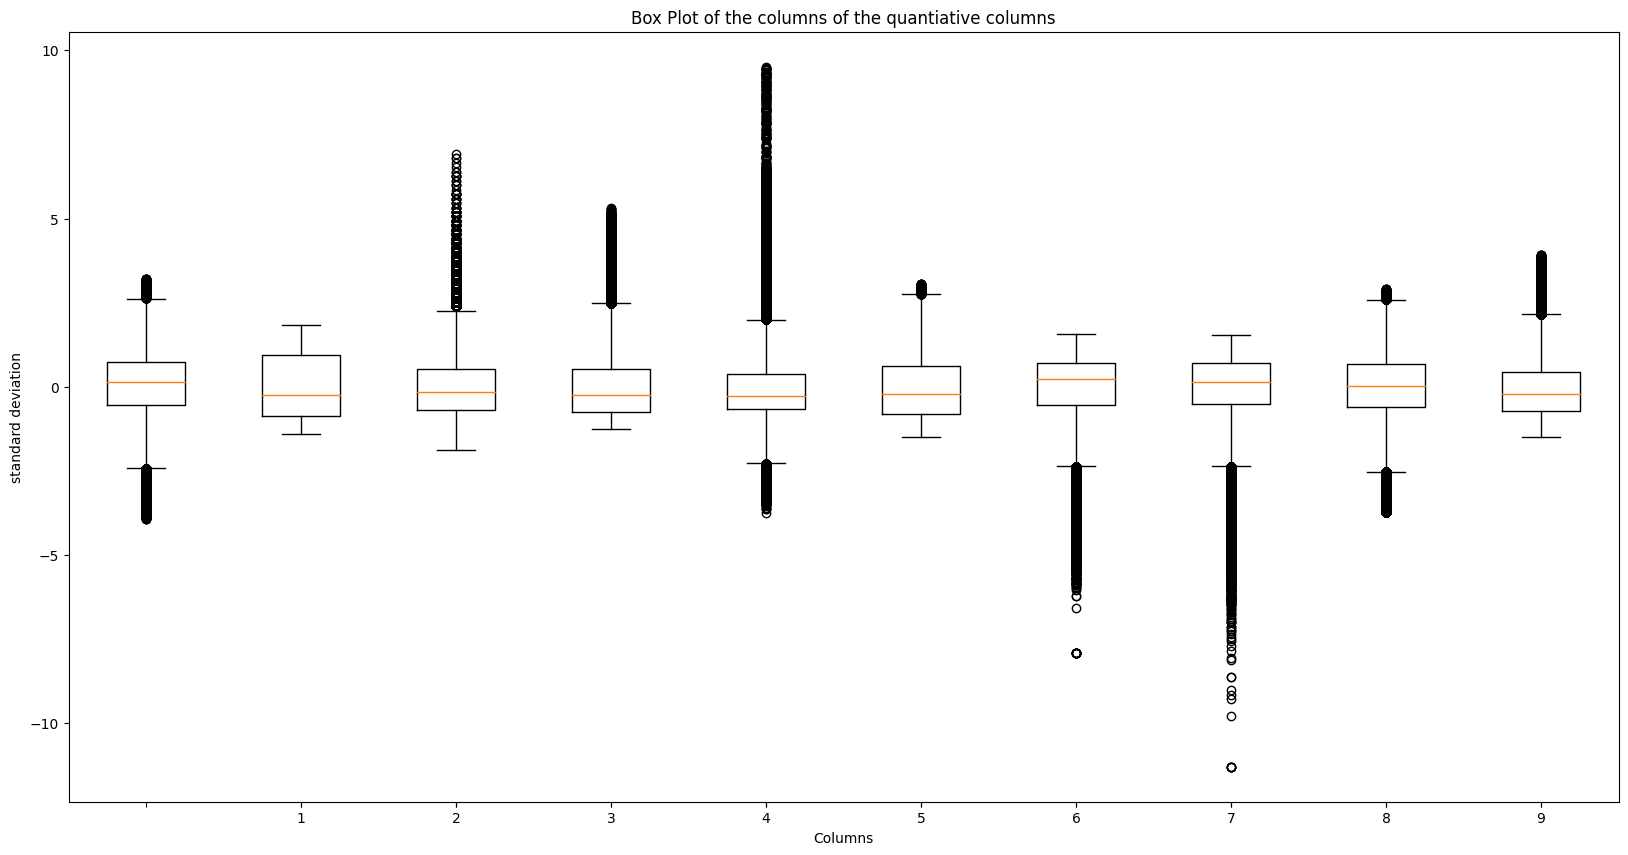

In [14]:
fig, axs = plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(np.arange(2,12), quantitative_columns)
plt.xlabel("Columns")
plt.ylabel("standard deviation")
plt.title("Box Plot of the columns of the quantiative columns")
_=plt.boxplot(quantitative_normalised_columns_df, vert = True)

In [ ]:
quantitative_normalised_columns_df

From the box-whisker plot above it is clear that there are outliers in the data

In [16]:
def IQR_outlier_handler(series_input):

    """ A function to return the indices of rows that contain outlier values of the series_input

    Args:
        series_input: a quantitative column that has continuous values

    Returns:
        a list of indices of values in series that are outliers
    """
    Q1 = series_input.quantile(0.25)
    Q3 = series_input.quantile(0.75)

    IQR = Q3 - Q1                      #IQR is interquartile range.

    lower_bound = Q1- 1.2*IQR        # the common factor multiplied by IQR is is 2, more than the usual value 1.5 due to foresight in the data as it (a factor of 1.5)
                                    # lead to almost the elimination of one class label
    higher_bound = Q3 + 1.2*IQR

    outlier_indices = list()  # a list to store indices of outlier values

    # a for loop to iterate over all values of a column and check for outlier values
    for k in range(len(series_input)):
        if ((series_input[k]> higher_bound) or (series_input[k]< lower_bound)):   # checking if a value is an outlier
            outlier_indices.append(k)

    return  outlier_indices


- For each columns checking for outliers and storing the indexes of outliers in df_outlier_indices list. 

- Later the unique index numbers from this list will be used to drop the perspective rows.

In [ ]:
df_outlier_indices = list()  # a list to store the unique index number of all rows in the dataframe that contain outlier values, that are to be dropped later

# Iterating over every column and identifying the rows/ indices that contain outlier values
for i in quantitative_columns:
    series_instance = quantitative_normalised_columns_df[i]   # a series selected
    outlier_indexes = IQR_outlier_handler(series_instance)    # applying
    for ind in outlier_indexes:
        if ind not in df_outlier_indices:
            df_outlier_indices.append(ind)
print(f"According to the BOX-WHISKER plot and IQR detection the number of rows with outlier values is: {len(df_outlier_indices)}\n")
print(f"The outlier indices are: {df_outlier_indices}")

Dropping the rows with outlier indices from the list. Similarily, dropping the same columns from the quantitative_nomralised_columns_df so that it is updated as well.

In [18]:
new_df.drop(index=df_outlier_indices, inplace = True)
quantitative_normalised_columns_df.drop(index=df_outlier_indices, inplace = True)   #updating the quantiatitve_normalised_columns_df as well

len_after_outlier_drop = len(new_df)
print(f"--> {len_after_na_drop-len_after_outlier_drop} rows with outliers dropped have been dropped after BOX-WHISKER plot and IQR ")

--> 160840 rows with outliers dropped have been dropped after BOX-WHISKER plot and IQR 


The normalised and cleaned data is: 

In [ ]:
new_df

# 2. Exploratory Data Analysis

## Extensive Visualisation

- Visualisation of the quantitative columns.
- visualisation of the categorical columns.
- visualisation of the classes.
- Exploring whether the feature columns of the data display linear relationship against the target column.

### 2.1 Class Labels

![class labels](../pictures/class_labels.png)

The class labels are already encoded with numerical values from 1 up to 7, representing the seven forest covers. 

In [20]:
class_labels = np.unique(new_df['cover_type'].values)
class_labels

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

Extracting points corresponding to each class and assigning them to a respective dataframe.

In [21]:
class_label1 = new_df.loc[new_df['cover_type']==1]
len_class_label1 = len(class_label1)
print(f"number of class label 1 is: {len_class_label1}")

class_label2 = new_df.loc[new_df['cover_type']==2]
len_class_label2 = len(class_label2)
print(f"number of class label 2 is: {len_class_label2}")

class_label3 = new_df.loc[new_df['cover_type']==3]
len_class_label3 = len(class_label3)
print(f"number of class label 3 is: {len_class_label3}")

class_label4 = new_df.loc[new_df['cover_type']==4]
len_class_label4 = len(class_label4)
print(f"number of class label 4 is: {len_class_label4}")

class_label5 = new_df.loc[new_df['cover_type']==5]
len_class_label5 = len(class_label5)
print(f"number of class label 5 is: {len_class_label5}")

class_label6 = new_df.loc[new_df['cover_type']==6]
len_class_label6 = len(class_label6)
print(f"number of class label 6 is: {len_class_label6}")

class_label7 = new_df.loc[new_df['cover_type']==7]
len_class_label7 = len(class_label7)
print(f"number of class label 7 is: {len_class_label7}")

number of class label 1 is: 167257
number of class label 2 is: 208733
number of class label 3 is: 14450
number of class label 4 is: 71
number of class label 5 is: 6974
number of class label 6 is: 8344
number of class label 7 is: 14342


In [22]:
fig = px.bar(x=np.arange(1,8), y=np.array([len_class_label1,len_class_label2,len_class_label3,len_class_label4,len_class_label5,len_class_label6,len_class_label7]), text_auto='.2s', title="Plot of frequency of each class label ")
fig.show()

The data is clearly hugeley imbalanced, this will be taken into consideration when developing machine learning models that capture the data. 

With such degree of imbalance as displayed in the plot above, the data must be carefully tended to.

### 2.2 Feature columns

#### 2.2.1 Visualizing the categorical columns separately due to their different meaning and values than the quantitative values

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
_=plt.plot(categorical_columns_df, label = categorical_columns_df.columns)
_=plt.title("Categorical columns plot")
_=plt.xlabel("Categorical columns")
_=plt.ylabel("Corresponding values")
_=plt.legend()

- In the plot, the 44 categorical columns have only two values each, 0 (absence) and 1 (presence) of a feature, and that's why the lines chart shows vertical slashes transitioning between values 0 and 1.

- Some of the columns might have the same constant value throught the whole dataset, and needs to be checked.

- If such column/feature exists, then it will be dropped as it is meaningless in predicing the output if it has the same value throughout.

- Thus, categorical values need to be checked for such behavior.

In [24]:
def constant_value_checker(series_to_be_checked):

    """A function that takes a series/column as an input and checks if it is a constant value througought all samples, to be used for categorical columns.

    Args:
        series (_type_): takes column values to be checked

    Returns:
        boolean _type_: returns True if it is a horizontal line, with constant value across all samples; it returns false otherwise.
    """
    is_flat = False
    if len(np.unique(series_to_be_checked))==1:   # if it has one value either 0 or 1 throught the whole dataset, then return true
        is_flat = True

    return is_flat

Checking every categorical column if they have constant value throughout.

- Only categorical columns are considered due to their nature of binary values in the data.

In [25]:
columns_to_be_dropped = list()   # a list to store columns,meaningless, with constant values throughout all the samples

# a for loop to iterate over all the categorical columns one by one
for col in categorical_columns_df:

    is_it_flat = constant_value_checker(categorical_columns_df[col].values)  # calling the function constant_value_checker to check if all the values of a series are the same
    if is_it_flat:      # if so, then to be dropped later, we append the column name into the columns_to_be_dropped list
        columns_to_be_dropped.append(col)

print(f"There are {len(columns_to_be_dropped)} columns that have one value throught all the samples.\nThe colulmns names are: {columns_to_be_dropped}")

There are 0 columns that have one value throught all the samples.
The colulmns names are: []


In [26]:
# Dropping the categorical columns that have unchanging value from the new_df and the categorical_columns_df

new_df.drop( columns = columns_to_be_dropped, inplace = True )
categorical_columns_df = categorical_columns_df.drop( columns = columns_to_be_dropped, inplace = True )

C:\Users\hoany\AppData\Local\Temp\ipykernel_9368\3936867411.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
print(column_names)

['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 'vertical_distance_to_hydrology', 'horizontal_distance_to_roadways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm', 'horizontal_distance_to_fire_points', 'wilderness_area1', 'wilderness_area2', 'wilderness_area3', 'wilderness_area4', 'soil_type1', 'soil_type2', 'soil_type3', 'soil_type4', 'soil_type5', 'soil_type6', 'soil_type7', 'soil_type8', 'soil_type9', 'soil_type10', 'soil_type11', 'soil_type12', 'soil_type13', 'soil_type14', 'soil_type15', 'soil_type16', 'soil_type17', 'soil_type18', 'soil_type19', 'soil_type20', 'soil_type21', 'soil_type22', 'soil_type23', 'soil_type24', 'soil_type25', 'soil_type26', 'soil_type27', 'soil_type28', 'soil_type29', 'soil_type30', 'soil_type31', 'soil_type32', 'soil_type33', 'soil_type34', 'soil_type35', 'soil_type36', 'soil_type37', 'soil_type38', 'soil_type39', 'soil_type40', 'cover_type']


##### 2.2.2.1 Correlation matrix of quantitative columns

- A strong correlation between two columns indicates that the two columns concerned provide similar information in the data, making one of them reduandant.

- This could ,first , worsen the performance of our model by masking other patterns displayed in our data. Secondly, it adds unnecessary complexity to our model.

- Both strong positive annd strong negative correlations provide the same insight of redundancy among columns - just in different ways, where positive correlation indicates that the two columns increase simultaneously negative correlation indicates that one of the columns increases when the other decreases, or vice versa.

- Therefore, such columns will be identified and one column from the pair of columns with strong correlation will be dropped.

- The threshold for strong correlation between two columns in this project will be set to 0.7.

In [28]:
correlated_new_df = quantitative_normalised_columns_df.corr()
correlated_new_df

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points
elevation,1.000000,0.078882,-0.096933,0.222870,0.091092,0.323934,-0.036567,0.107229,0.094699,0.138631
aspect,0.078882,1.000000,0.034045,-0.001872,0.046979,0.045566,-0.588623,0.400881,0.658454,-0.113431
slope,-0.096933,0.034045,1.000000,-0.000778,0.219406,-0.120356,-0.111542,-0.370958,-0.223074,-0.052643
horizontal_distance_to_hydrology,0.222870,-0.001872,-0.000778,1.000000,0.559425,0.023165,-0.027333,0.005849,0.026289,0.071850
vertical_distance_to_hydrology,0.091092,0.046979,0.219406,0.559425,1.000000,-0.006841,-0.085137,-0.050963,0.013898,-0.003687
horizontal_distance_to_roadways,0.323934,0.045566,-0.120356,0.023165,-0.006841,1.000000,-0.046312,0.110030,0.105485,0.208289
hillshade_9am,-0.036567,-0.588623,-0.111542,-0.027333,-0.085137,-0.046312,1.000000,-0.112832,-0.843186,0.110073
hillshade_noon,0.107229,0.400881,-0.370958,0.005849,-0.050963,0.110030,-0.112832,1.000000,0.612819,-0.049135
hillshade_3pm,0.094699,0.658454,-0.223074,0.026289,0.013898,0.105485,-0.843186,0.612819,1.000000,-0.103103
horizontal_distance_to_fire_points,0.138631,-0.113431,-0.052643,0.071850,-0.003687,0.208289,0.110073,-0.049135,-0.103103,1.000000


A heatmap of the correlation matrix using seaborn

<Axes: title={'center': 'Heatmap of the corerlation of the quantitative columns'}>

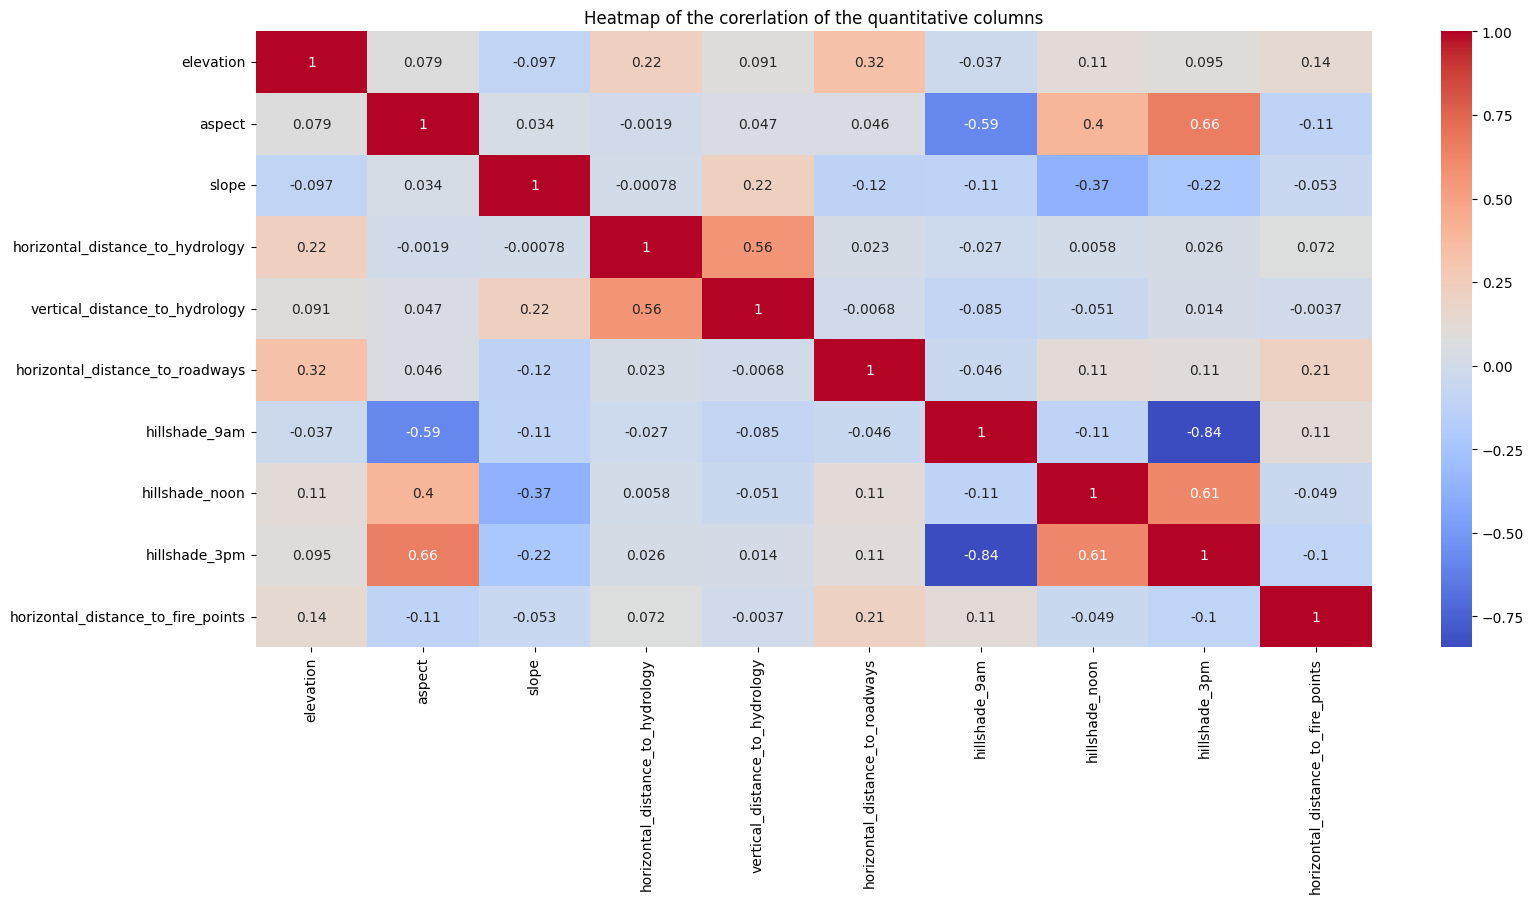

In [29]:
fig, ax = plt.subplots(figsize=(18, 8))                                          # using matplotlib's plt with seaborn to set to change the size of the correlation matrix
plt.title("Heatmap of the corerlation of the quantitative columns")              # again using matplotlib's plt to display the title of the heatmap plot
sns.heatmap(correlated_new_df.values,xticklabels = correlated_new_df.columns, yticklabels= correlated_new_df.columns, cmap = 'coolwarm',annot = True)  # viridis, Spectral

From the heatmap plot of the correlation matrix it is evidient that there are columns that display strong correlation. Especially hillshade_3am and hillshade_9am. 

For very strongly correlated columns, one of them will be dropped since the remaining column is repsentative enough of the variation displayed by the two columns. 



The correlation between the most correlated columns can be visualised using the histogram plot of the actual normalised data.

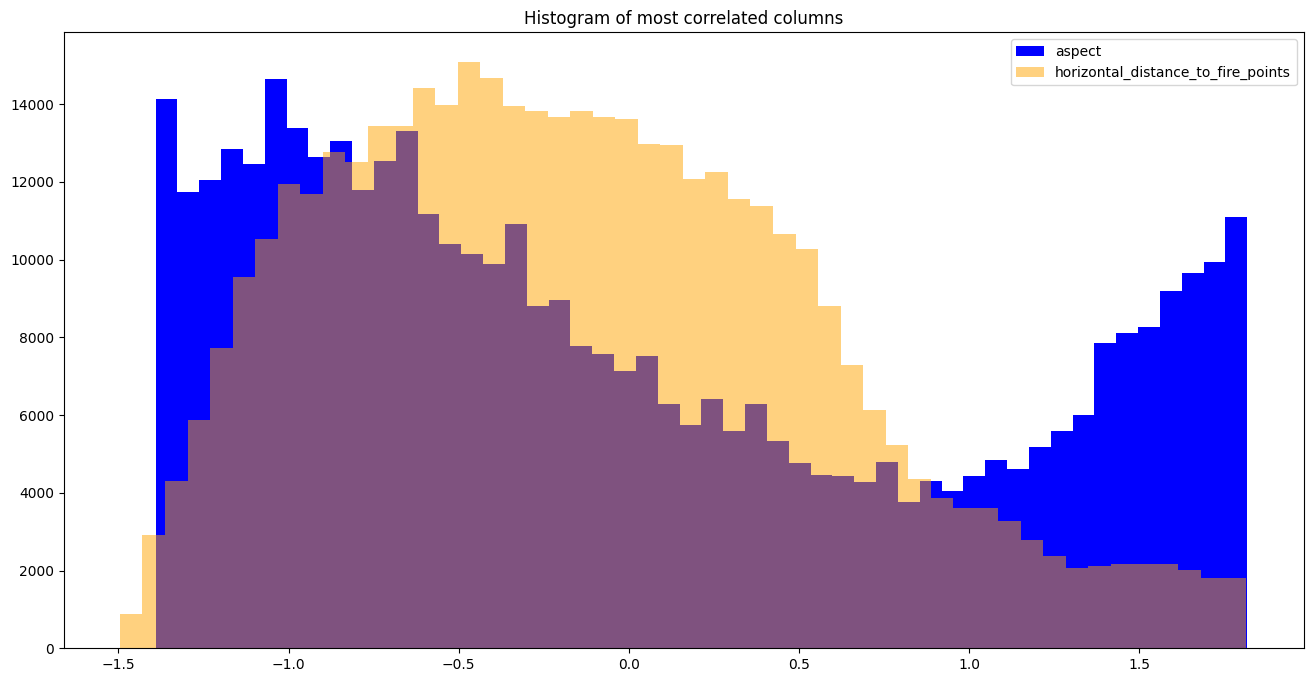

In [30]:
fig,ax = plt.subplots()

fig.set_size_inches(16,8)
plt.hist(new_df['aspect'],bins=50, color='blue', label = 'aspect')
plt.title("Histogram of most correlated columns")
plt.hist(new_df['horizontal_distance_to_fire_points'],bins=50, color='orange',alpha=0.5, label = 'horizontal_distance_to_fire_points')
plt.legend()
plt.show()

The histogram plot supports the correlation values of the two most correlated columns.

In [31]:
def strongly_correlated_columns_finder(correlated_df, strong_threshold):
    """A function that takes a dataframe that has column names as its indexes. Those rows, which are columns definitely have strong correlation.
    The purpose of this function is to find the pairing column from the correlation matrix that results in strong correlation by iterating over all the columsn.

    Args:
        correlated_df (_type_): _description_
        strong_threshold (_type_): a threshold value that determines if a pair of columns have strong correlation, effectively determining redundant columns.

    Returns:
        A list of tuples, column pairs, that have strong correlation.
    """
    correlated_columns_tuple = list()
    # for loop to iterate over the columns that have strong correlation, that are indexes in the correlated_df
    for j in correlated_df.index:
        # for loop to iterate over all the columns of the original data, to identify those that have strong correlation with the selected column j
        for k in correlated_df:
            correlation_value = correlated_df[k].loc[j]      # obtaining a correlation value

            # checking if value indicates strong corerelation by taking the absolute value of correlation value
            if (abs(correlation_value)>strong_threshold and abs(correlation_value < 1)):
                # checking if the pair fo columns doesn't already exist in the list
                if ((k,j) not in correlated_columns_tuple):
                    correlated_columns_tuple.append((j,k))     # saving the corresponding columns that have a strong correlation
                    print(f"Strongly-correlated pair {(j,k)} ")

    return correlated_columns_tuple

In [32]:
strong_threshold = 0.68
strongly_correlated_metrices = list()

# extracting the strongly correlated columns: strong positive correlation and strong negative correlation
strong_corr_entries_df = correlated_new_df[(((correlated_new_df.values>strong_threshold) & (correlated_new_df.values!=1.00))|
                                          ((correlated_new_df.values< -strong_threshold) & (correlated_new_df.values!=-1.00)))]
"""
trong_corr_positive df extracts a dataframe with all columns of the correlation matrix but only the rows(which are also column names) that definitely have strong correlation
values by utilising the strong_threshold to determine the rows with strong correlation values.
This is computationally efficient, instead of checking for strong correlation across rows against all columns of the correlation matrix
we only check those rows that have strong correlation against all the columns to find their counteraprt columns that result in strong correlation
"""
print(f"The content of the strong_corr_entries_df with entries that contain strong correlation values is: ")
display(strong_corr_entries_df)

The content of the strong_corr_entries_df with entries that contain strong correlation values is: 


,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points
hillshade_9am,-0.036567,-0.588623,-0.111542,-0.027333,-0.085137,-0.046312,1.000000,-0.112832,-0.843186,0.110073
hillshade_3pm,0.094699,0.658454,-0.223074,0.026289,0.013898,0.105485,-0.843186,0.612819,1.000000,-0.103103


Identifying all the column pairs that result in strong correlation using the strongly_correlated_columns_finder() function

In [33]:
correlated_columns_pairs = strongly_correlated_columns_finder(strong_corr_entries_df, strong_threshold)

Strongly-correlated pair ('hillshade_9am', 'hillshade_3pm') 


Dropping all the redundant columns from the pairs strong correlation column pairs

In [34]:
def drop_redundant_columns(column_pairs):

    unique_redundant_columns = list()  # a list to store columns that are redundant from every pair

    # Extracting the unique column values
    columns_keys_crude = list()
    for i in column_pairs:
        columns_keys_crude.append(i[0])
        columns_keys_crude.append(i[1])
    columns_keys = np.unique(np.array(columns_keys_crude))

    # A dictionary of the frequency of unique column in the pairs
    frequency_dict = {}
    for j in columns_keys:
        frequency_dict[j] = columns_keys_crude.count(j)

    # iterating over every strong correlation pair of columns
    for j in column_pairs:
        column0 = j[0]    # we will select the first element of the tuple element as the redundant column, to be dropped later
        column1 = j[1]
        redundant_column = column0   #initializing the redundant_column value with the first column's name

        # The column that occurs most in many pairs should be the one selected as a redundant
        if frequency_dict[column0]<frequency_dict[column1]:
            redundant_column = column1


        # Checking if the first pair columns aren't already selected as redundant before
        if (column0 not in unique_redundant_columns) and (column1 not in unique_redundant_columns):
            unique_redundant_columns.append(redundant_column)     # the most frequent of the two columns will be appended as redundant
        elif (column0 in unique_redundant_columns) and (column1 not in unique_redundant_columns):
            unique_redundant_columns.append(column0)     # we will select the first element of the tuple element as the redundant column, to be dropped later
        elif (column0 not in unique_redundant_columns) and (column1 in unique_redundant_columns):
            unique_redundant_columns.append(column1)     # we will select the first element of the tuple element as the redundant column, to be dropped later
    print("Redundant, and therefore to be dropped columns are: ", unique_redundant_columns)

    # When dropping we have to update the new_df and the quantitative_normalised_df
    quantitative_normalised_columns_df.drop(columns = unique_redundant_columns, inplace = True)
    new_df.drop(columns=unique_redundant_columns, inplace = True)


In [ ]:
drop_redundant_columns(correlated_columns_pairs)
quantitative_normalised_columns_df

##### 2.2.3 Principal Component Analysis

Principal component analysis will be used to reduce the dimension of the data in this section.

First, the new_df dataframe will be divided into target and features dataframes.

In [36]:
features_df = new_df[new_df.columns[:-1]]     # extracting all the features into features_df dataframe
target_df = new_df[new_df.columns[-1]]      # extracting the class label column into a new target df

In [37]:
X = features_df.values
y = target_df.values
X.shape

(420171, 53)

To decide on the number of components, several number of PCA components will be tried and the smallest number that give satisfactory variation of data will be selected.

In [ ]:
n_components = np.arange(1,40)

components_dict = {}   # a dictionary to store number of components as keys and their cummulative sum of variation as values

# iterating for every number of components
for i in n_components:
    temp_instance = PCA(i)   # creating a PCA object for the corresponding number of components from the list
    temp_fit = temp_instance.fit(X)   # we are fitting, the dimension reduction model with the 2D array from lab tasks
    X_temp = temp_fit.transform(X)  # transforming the data using the fitted PCA model

    temp_components_ratio = temp_fit.explained_variance_ratio_
    temp_cumsum = (np.cumsum(temp_components_ratio))*100

    components_dict[i] = temp_cumsum       # storing the cummulative sum into the dictionary

components_dict

Selecting the relevant number of components

In [39]:
keys_val = list()
cummulative_variation = list()
required_variance_by_k_components = 99.5    # desired percential of variation to be captured by the PCA components
optimal_n_components = 1     #variable initialised to 1
never_executed = True

# for loop for iterating over the dictionary to get the number of components that satisfy required variance of data and store components and cummulative variance into lists
for i in components_dict:
    keys_val.append(i)
    variance_by_n_component = components_dict[i][-1]
    cummulative_variation.append(variance_by_n_component)
    if ((variance_by_n_component >= required_variance_by_k_components ) and (never_executed)):
        never_executed = False;
        optimal_n_components = i
print(f"After iterating over the components the optimal number that satisfies the requirements is: {optimal_n_components}")

After iterating over the components the optimal number that satisfies the requirements is: 31


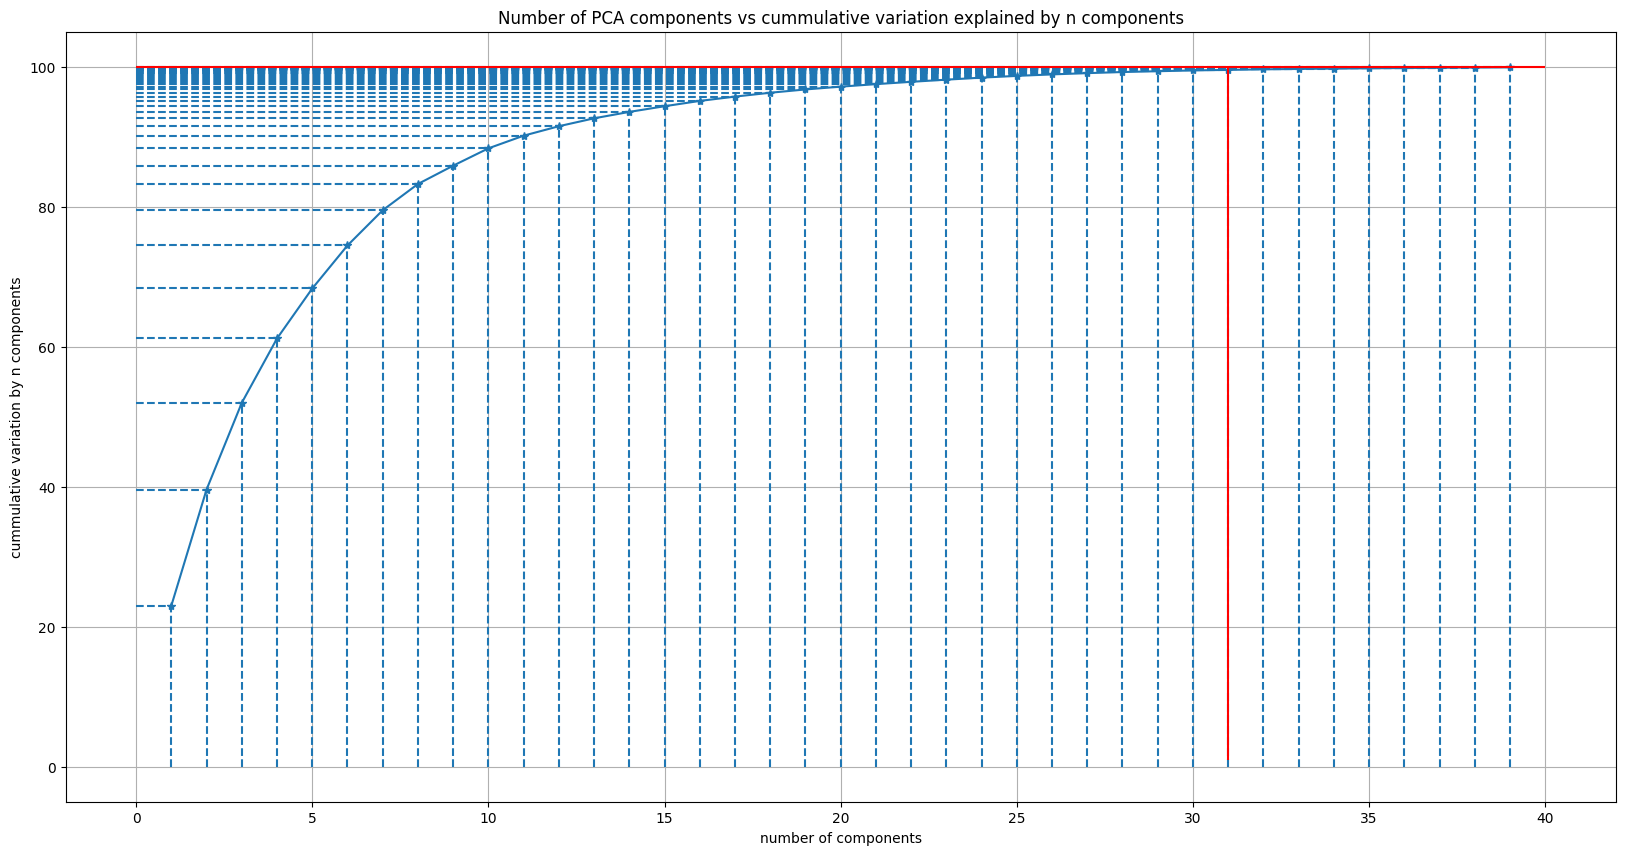

In [40]:

keys_val = list()
cummulative_variation = list()
for i in components_dict:
    keys_val.append(i)
    cummulative_variation.append(components_dict[i][-1])

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
plt.plot(keys_val,cummulative_variation, '-*' )
plt.grid()
plt.title("Number of PCA components vs cummulative variation explained by n components")
_=plt.xlabel("number of components")
_=plt.ylabel("cummulative variation by n components")
plt.vlines(keys_val, 0, cummulative_variation, linestyle="dashed")
plt.hlines(cummulative_variation, 0, keys_val, linestyle="dashed")
plt.hlines(99.9, xmin=0, xmax= 40,colors='red')
plt.vlines(optimal_n_components, ymin=1, ymax= 100,colors='red')



As can be seen by the vertical red line 30 of the most significant PCA components that explain 99.5 of the variance in the data will be used.

In [41]:
pca_instance = PCA(n_components=optimal_n_components)
pca_instance.fit(X)
X_reduced = pca_instance.transform(X)  # transforming the data using the fitted PCA model

X_reduced.shape     # a reduced / transformed features values

(420171, 31)

##### 2.2.3.1 Visualising the PCA components

Text(0, 0.5, 'Variance_ratio in out of 1')

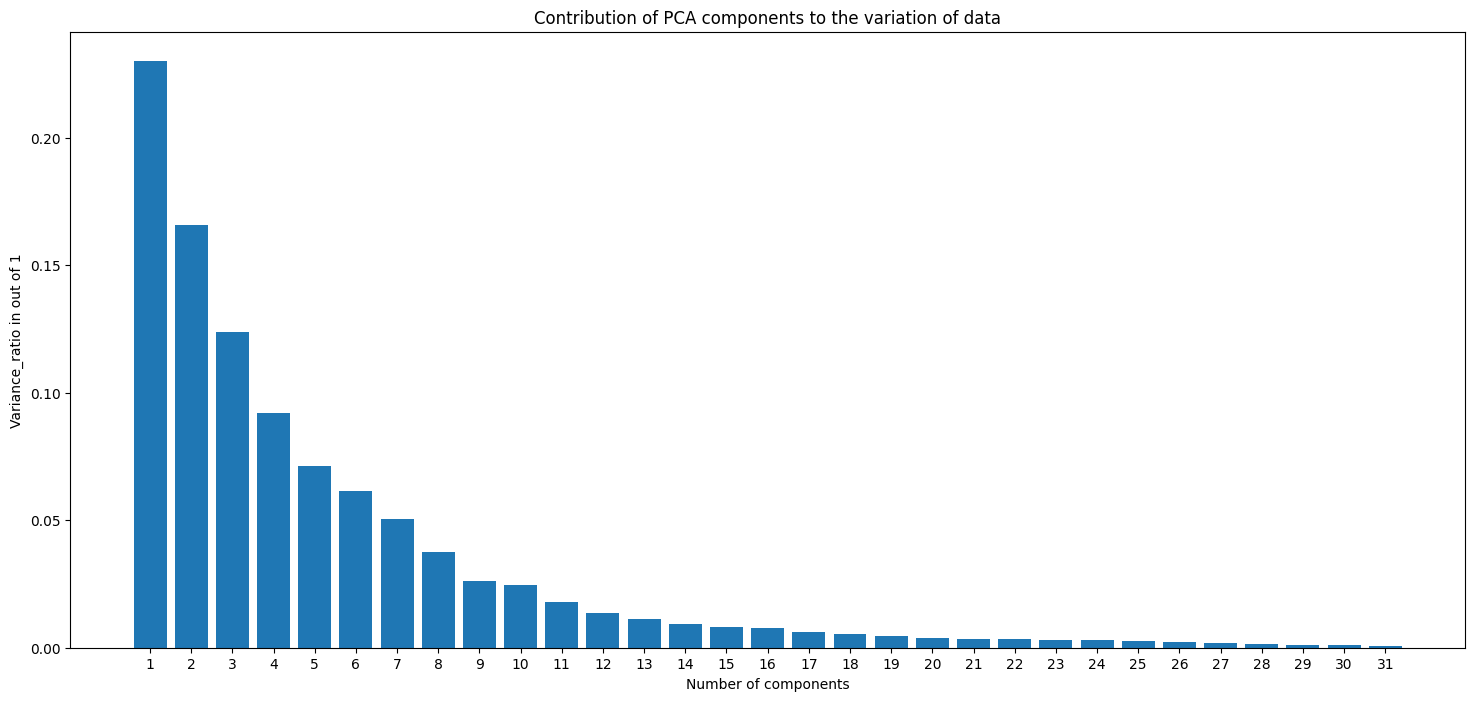

In [42]:
# Identifying major components and their ratio in explaining variance in the data
components_contribution = pca_instance.explained_variance_ratio_

fig, ax = plt.subplots()
fig.set_size_inches(18,8)
plt.bar(np.arange(1,len(components_contribution)+1,1), components_contribution)
plt.xticks(np.arange(1,len(components_contribution)+1,1))
# plt.grid()
plt.title("Contribution of PCA components to the variation of data")
plt.xlabel("Number of components")
plt.ylabel("Variance_ratio in out of 1")
# plt.ylim(0,1)

A plot of the distribution of variance in the data explained by the number of components selected, in descending significance. 

Plotting the relation between the most important two components to visualise the influence of the two most important components and class labels distribution.

In [43]:
new_df['first-component'] =X_reduced[:,0]    #adding the first component to the new_df component to be regrouped into each class's contribution
new_df['second-component'] =X_reduced[:,1]    #adding the second component to the new_df component to be regrouped into each class's contribution

#creating dataframes for each class label, with information that includes first-component and second-components
class_label1 = new_df.loc[new_df['cover_type']==1]
class_label2 = new_df.loc[new_df['cover_type']==2]
class_label3 = new_df.loc[new_df['cover_type']==3]
class_label4 = new_df.loc[new_df['cover_type']==4]
class_label5 = new_df.loc[new_df['cover_type']==5]
class_label6 = new_df.loc[new_df['cover_type']==6]
class_label7 = new_df.loc[new_df['cover_type']==7]

![class-labels](../Dataset/class_labels.png)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)


_=plt.scatter(class_label1['first-component'], class_label1['second-component'], color = 'red', label = 'Spruce/Fir')
_=plt.scatter(class_label2['first-component'], class_label2['second-component'], color = 'blue', label = 'Lodgepole Pine')
_=plt.scatter(class_label3['first-component'], class_label3['second-component'], color = 'green', label = 'Ponderosa Pine')
_=plt.scatter(class_label4['first-component'], class_label4['second-component'], color = 'purple', label = 'Cottonwood/Willow')
_=plt.scatter(class_label5['first-component'], class_label5['second-component'], color = 'orange', label = 'Aspen')
_=plt.scatter(class_label6['first-component'], class_label6['second-component'], color = 'cyan', label = 'Douglas-fir')
_=plt.scatter(class_label7['first-component'], class_label7['second-component'], color = 'magenta', label = 'Krummholz')


_=plt.legend(fontsize=16)
_=plt.grid()
_=plt.xlabel('First component',fontsize=16);
_=plt.ylabel('Secon component', fontsize=16);
_=plt.title('First Component vs Second component PCA',fontsize=16);
_=plt.xticks(fontsize=16);
_=plt.yticks(fontsize=16);


In [ ]:
new_df

### 2.3 Checking for the strength of linearity in the data

- Correlation between two columns indicates the strength of linear relationship between the columns. 

- Thus, analysing the correlation value of all the feature columns individually against the target value would give us an idea of the linear strength the data. 

- This understanding of the nature of the data will be employed in later stages, such as when selecting activation function. 

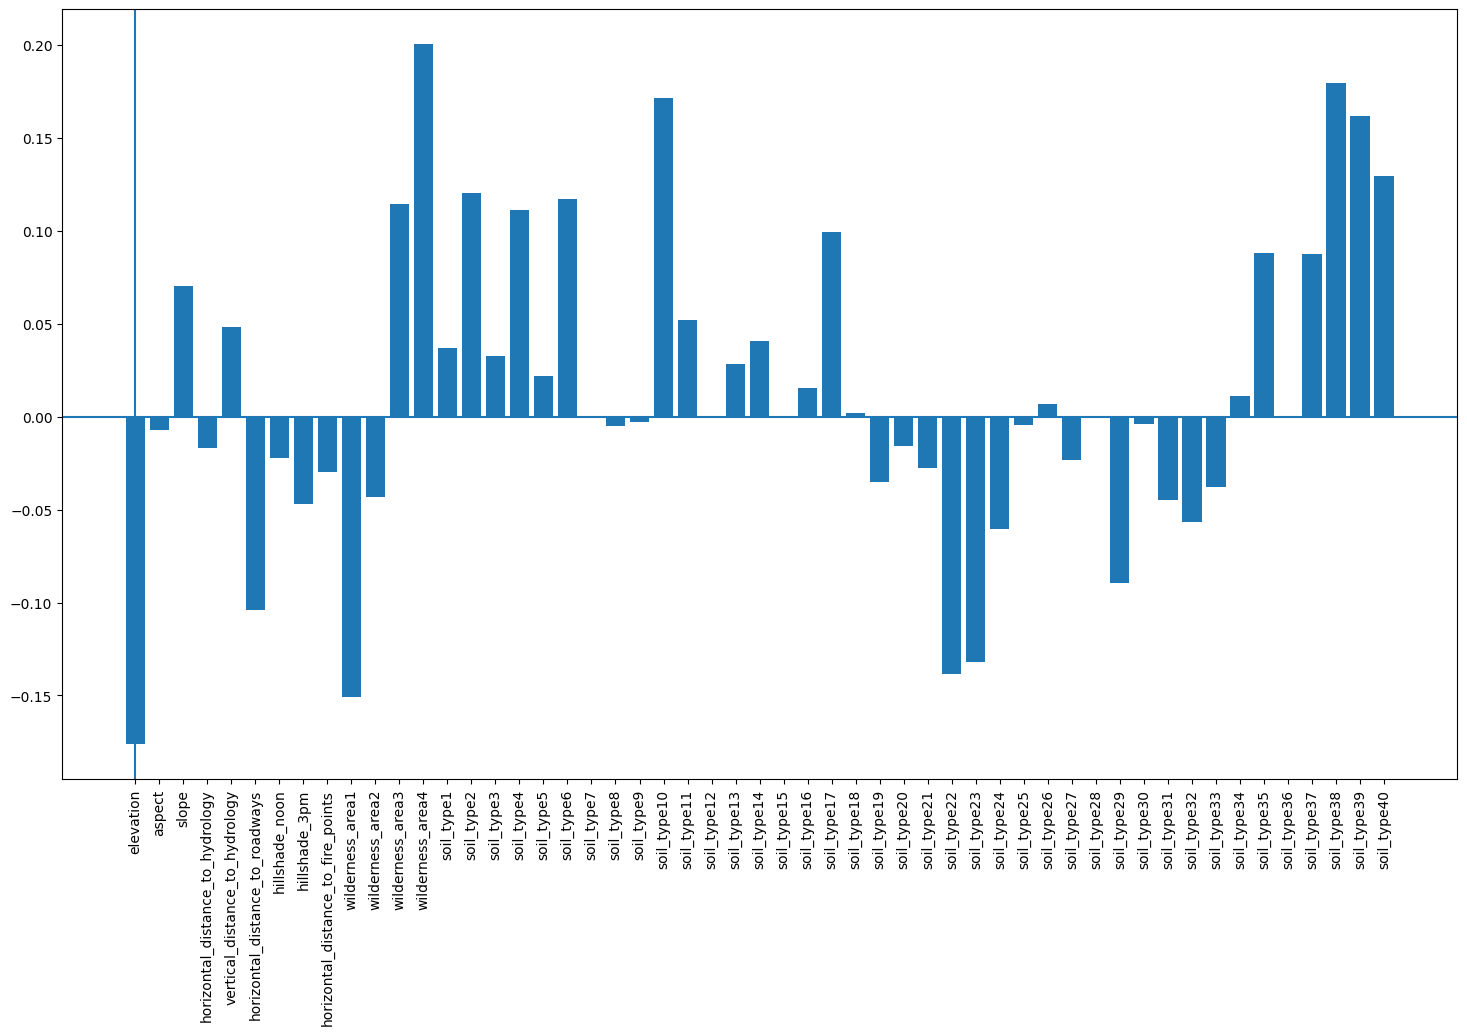

In [46]:
# To find if the feature columns exhibit strong linear relationship with the target column, correlation with the target column will be evaluated for every column

linearity_correlation = new_df[new_df.columns[:-2]]  # excluding the first-component and second-component columns as they have no meaning in this case
linearity_correlation = linearity_correlation.corr()

# the last column of linearity_correlation holds the correlation of every column(which are presneted in rows) against the covertype column
correlation_column = linearity_correlation[linearity_correlation.columns[-1]]

# Plotting the correlation of every column against the target 'cover_type' column
_=fig, ax = plt.subplots()
_=fig.set_size_inches(18,10)
_=plt.bar(linearity_correlation.columns[:-1], correlation_column.values[:-1])
_=plt.xticks(linearity_correlation.columns[:-1], rotation = 'vertical')
_=plt.axhline( )
_=plt.axvline( )
# _=plt.yticks((np.linspace(-0.5,1))


- As can bee seen none of the columns have strong correlation with the target column, thus we can say that the features do not display a linear correlation with the target column.

- This behavior of the data, that is the realisation of very weak linear relation between all columns and target columns, will be utilised in selecting activation functions (non-linear).


# 3. Models training and evaluation

Since the task at hand is a classification problem, then the following models will be evaluated, and tunned to achieve best accuracy.

  - k-nearest neighbours = to be used as a baseline model.

  - Naive-Bayes classifier = since correlation between features has been handled in prior steps, the naive assumption of independence is valid.

  - Logistic regression 

  - Decision trees

  - Multi-layer-perceptron (MLP)




Splitting the data into training (75%) and testing sets (25%)

In [47]:
X_train,X_test, y_train, y_test = train_test_split(X_reduced,y, test_size = 0.25)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((315128, 31), (105043, 31), (315128,), (105043,))

A dictionary to store every model's name, its accuracy, its error rate, precision and mathew's corrleation coefficient for later comparision.

In [48]:
model_and_their_scores_dict = {}     # this dictionary will store a model's name, its accuracy, its error rate, precision and mathew's corrleation coefficient for later comparision.

### 3.1 K-nearst neighbours

-To find the optimal prediction we will use several k-neighbors.

- Due to the imbalanced class labels that exists in the data the error for each model will be evaluated instead of the accuracy.

- For the covertype classification problem, it can deduced that cost of **false positives** are high. This is due to the fact that if an environment has been labelled incorrectly as suitable for a certain forest type, then all the investment and efforts spent are for nothing.  

In [49]:
k_candidates = np.arange(1,13,2)    # k - number of kneighbours can only be odd numbers

k_models_dictionary = {}   # a dictionary to store the precision, f1 score and accuracy of k neighbors in the format {"k": test_accuracy, train_accuracy}

for k_instance in k_candidates:
    knn_classifier = KNeighborsClassifier(n_neighbors=k_instance)
    knn_classifier.fit(X_train, y_train)
    knn_classifier_prediction = knn_classifier.predict(X_test)
    
    # calculating the error for the k neighbours
    knn_train_error =np.mean(knn_classifier.predict(X_train) != y_train)
    knn_test_error =np.mean(knn_classifier_prediction != y_test)



    k_metric_values = [knn_train_error,knn_test_error]
    k_models_dictionary[k_instance] = k_metric_values
    print(f"\nk = {k_instance}")
    print(f"The error of the knn model on the training set is  is  {knn_train_error}")
    print(f"The error of the knn model on the testing set is {knn_test_error}")




k = 1
The error of the knn model on the training set is  is  0.0
The error of the knn model on the testing set is 0.06396428129432709

k = 3
The error of the knn model on the training set is  is  0.030879515625396665
The error of the knn model on the testing set is 0.06574450463143665

k = 5
The error of the knn model on the training set is  is  0.044213779797415656
The error of the knn model on the testing set is 0.07195148653408603

k = 7
The error of the knn model on the training set is  is  0.05343860272651113
The error of the knn model on the testing set is 0.07708271850575478

k = 9
The error of the knn model on the training set is  is  0.060860983473382244
The error of the knn model on the testing set is 0.08174747484363547

k = 11
The error of the knn model on the training set is  is  0.0668712396232642
The error of the knn model on the testing set is 0.0858124767952172


Plotting the error for the number of neighbours selected on the training and testing set.

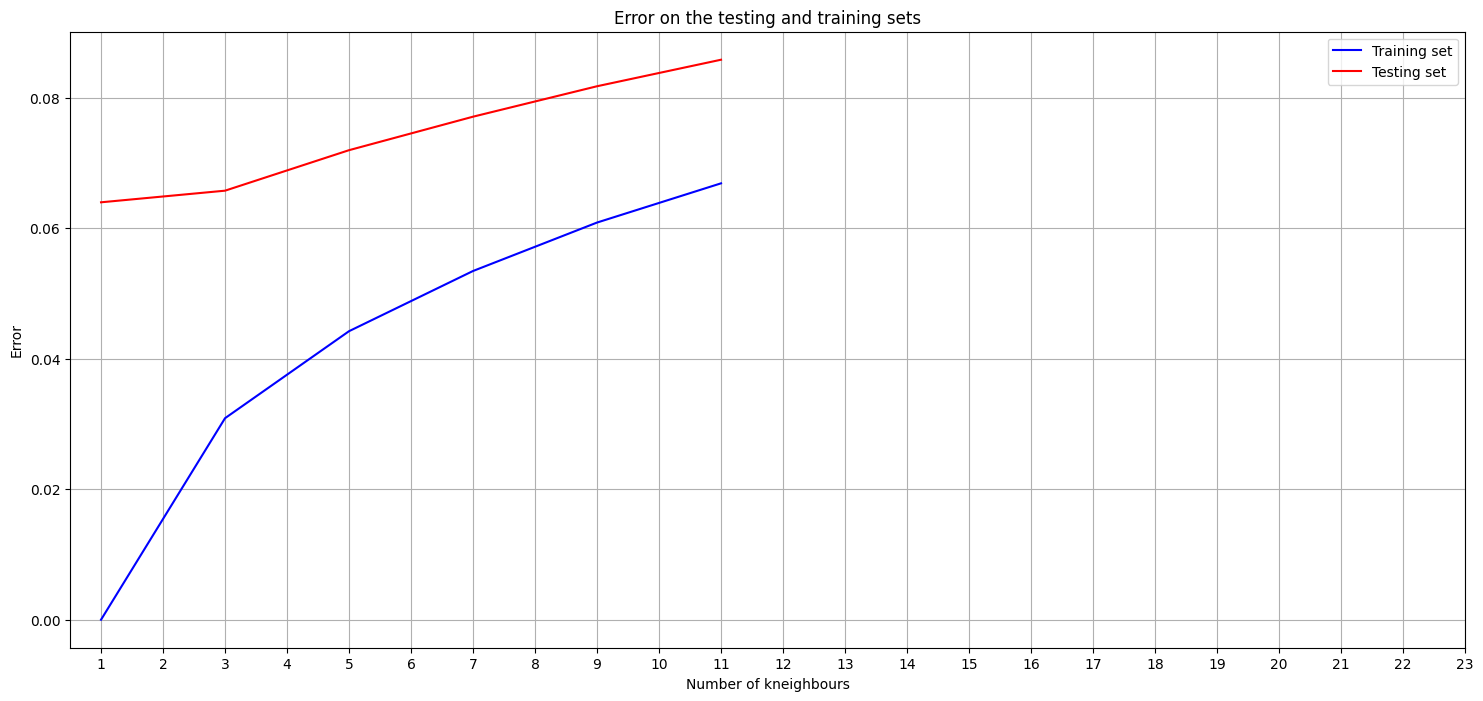

In [50]:
fig, axs = plt.subplots()
fig.set_size_inches(18,8)

k_train = []
k_test = []
# k_mathew =[]
for ke in (k_models_dictionary.keys()):
  k_train.append(k_models_dictionary[ke][0])
  k_test.append(k_models_dictionary[ke][1])
  # k_mathew.append(k_models_dictionary[ke][2])

plt.plot(list(k_models_dictionary.keys()), np.array(k_train).reshape(-1,1), 'blue', label = "Training set")
plt.plot(list(k_models_dictionary.keys()),np.array(k_test).reshape(-1,1), 'red',label = 'Testing set')
plt.title("Error on the testing and training sets")
plt.xlabel("Number of kneighbours")
plt.ylabel("Error")
plt.xticks(np.arange(1,24,1))
plt.legend()
plt.grid()

From the plot above, the optimal number of neighbors is __5___. Consequently, this will be added to the model_and_their_scores_dict to be compared with other algorithms' results.

- K-neighbours classifier's accuracy will be used as a baseline to other algorithms.

- Not only the accuracy of the K-NN model will be compared against other algorithms but also the precision and mathew's correlation coefficient.

In [51]:
k_optimal = 5

knn_classifier = KNeighborsClassifier(n_neighbors=k_optimal)
knn_classifier.fit(X_train, y_train)
knn_classifier_prediction = knn_classifier.predict(X_test)

# Evaluation scores includes: error_rate, accuracy, precision, mathew_correlation-coefficient
knn_accuracy_test = accuracy_score(y_test, knn_classifier_prediction)
knn_error_rate = np.mean(knn_classifier_prediction != y_test)
knn_precision = precision_score(y_test, knn_classifier_prediction, average='weighted')    # weighted average is
knn_mathew_corre_coeff = matthews_corrcoef(y_test, knn_classifier_prediction)
model_and_their_scores_dict['k-NN'] = [knn_accuracy_test, knn_error_rate,  knn_precision, knn_mathew_corre_coeff]
print(f"The accuracy of the knn model is  {knn_accuracy_test}")
print(f"The precision of the knn model is  {knn_precision}")

The accuracy of the knn model is  0.928048513465914
The precision of the knn model is  0.9277721258906565


<Axes: title={'center': 'Confusion matrix of Knn (n=5)'}>

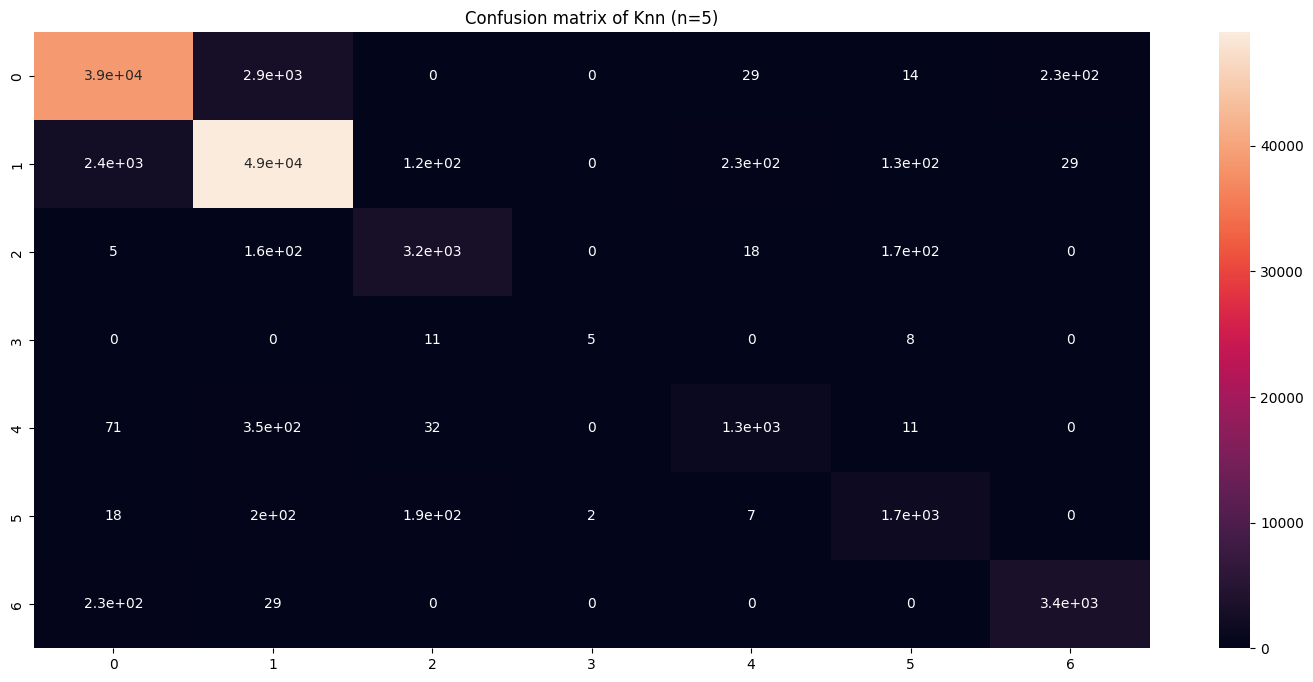

In [52]:
knn_confusion = confusion_matrix(y_test, knn_classifier_prediction)
fig, ax = plt.subplots(figsize=(18, 8))                                          # using matplotlib's plt with seaborn to set to change the size of the correlation matrix
plt.title("Confusion matrix of Knn (n=5)")              # again using matplotlib's plt to display the title of the heatmap plot
sns.heatmap(knn_confusion,annot = True)  # viridis, Spectral

In [53]:
model_and_their_scores_dict   # displaying the contents of the models and their evaluation values dictionary

{'k-NN': [0.928048513465914,
  0.07195148653408603,
  0.9277721258906565,
  0.8784005137076737]}

### 3.2 Naive-Bayes Classifier

- Due to its fast implementation and good performance with multi-class classification Naive-Bayes classifer will be used.

- Since highly correlated features/columns have been removed potential dependency is reduced, and the independence amongst features assumption could be considered.

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
# creating a gaussian naive bayes model instance
gnb = GaussianNB()

# fitting the model with the data
gnb.fit(X_train, y_train)

#predicting model's perfomrance on training and testing features
gnb_test_predicted = gnb.predict(X_test).reshape(-1,1)
gnb_train_predicted = gnb.predict(X_train).reshape(-1,1)

#calculating the error of classification on the training and testing sets
gnb_train_error = np.mean(y_train.reshape(-1,1)!=gnb_train_predicted )
gnb_test_error = np.mean(y_test.reshape(-1,1)!= gnb_test_predicted)

print(f"The error of the Naive-Bayes model on the training set is = {gnb_train_error}")
print(f"The error of the naive-bayes model on the testing set is = {gnb_test_error}")

The error of the Naive-Bayes model on the training set is = 0.4092940011677794
The error of the naive-bayes model on the testing set is = 0.4079186618813248


Once the model has been fit, its performance will be evaluated on the metrics agreed: accuracy, error, precision, mathe_corre-coeff and stored in the models dictionary.

In [56]:
naive_bayes_accuracy_test = accuracy_score(y_test, gnb_test_predicted)    #accuracy of the model 
naive_bayes_error_rate = np.mean(gnb_test_predicted != y_test)          #error of the model
naive_bayes_precision = precision_score(y_test, gnb_test_predicted, average='weighted')    # precision of the model, with 'weighted' average due to class imbalance observerd earlier
naive_bayes_mathew_corre_coeff = matthews_corrcoef(y_test, gnb_test_predicted)    # mathew's correlation coefficient
model_and_their_scores_dict['Naive-Bayes'] = [naive_bayes_accuracy_test, naive_bayes_error_rate,  naive_bayes_precision, naive_bayes_mathew_corre_coeff]

gnb_test_accuracy = accuracy_score(y_test, gnb_test_predicted)
gnb_train_accuracy = accuracy_score(y_train, gnb_train_predicted)

print(f"The accuracy of the Naive-Bayes model on the training set is  is  {gnb_train_accuracy}")
print(f"The accuracy of the naive-bayes model on the testing set is {gnb_test_accuracy}")

The accuracy of the Naive-Bayes model on the training set is  is  0.5907059988322205
The accuracy of the naive-bayes model on the testing set is 0.5920813381186752


<Axes: title={'center': 'Confusion matrix of Naive-Bayes'}>

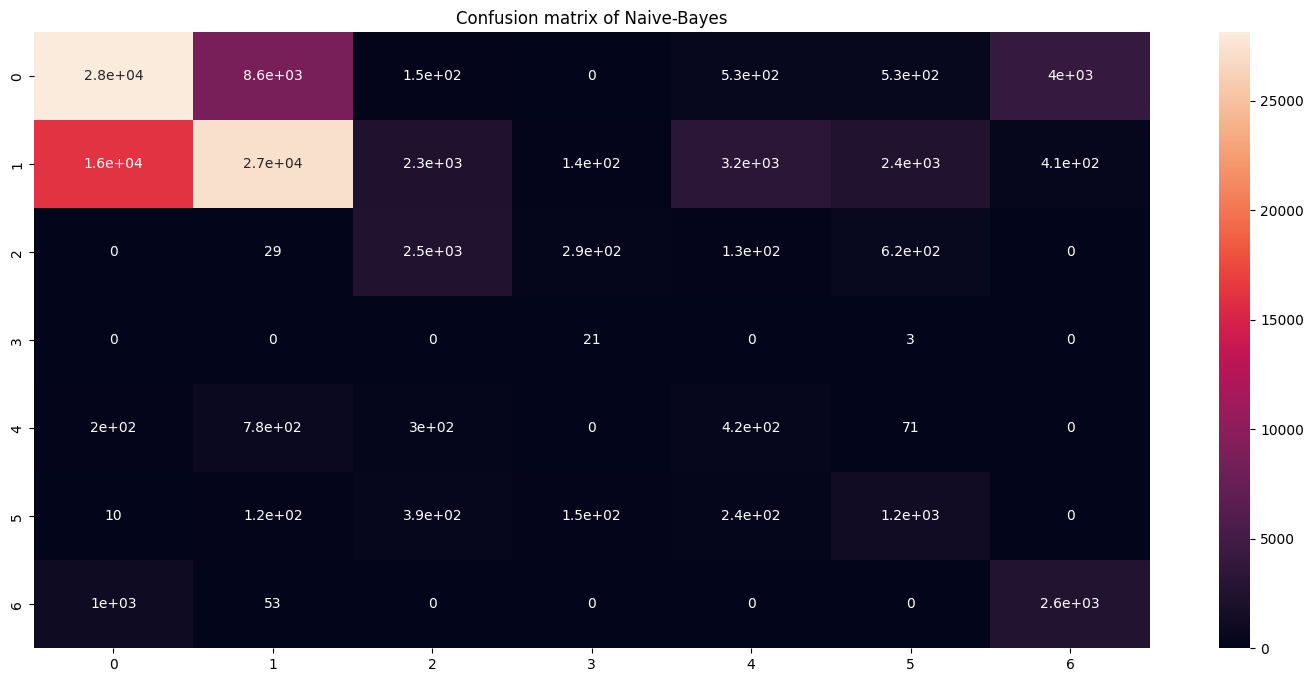

In [57]:
naive_confusion = confusion_matrix(y_test, gnb_test_predicted)
fig, ax = plt.subplots(figsize=(18, 8))                                          # using matplotlib's plt with seaborn to set to change the size of the correlation matrix
plt.title("Confusion matrix of Naive-Bayes")              # again using matplotlib's plt to display the title of the heatmap plot
sns.heatmap(naive_confusion,annot = True)  # viridis, Spectral

In [58]:
model_and_their_scores_dict

{'k-NN': [0.928048513465914,
  0.07195148653408603,
  0.9277721258906565,
  0.8784005137076737],
 'Naive-Bayes': [0.5920813381186752,
  0.6475197829565373,
  0.6473205190559768,
  0.37791675633708627]}

The Naive-Bayes models' performance results are not good. This could be attributed to the nature how a naive-bayes works. 

  - That is the testing set might not have a similar gaussian distribution as the training set. This reason has been attributed as the cause of very low performance by the Naive-Bayes model



                                                                                                                                                                                .

For proceeding models sklearn's GridSearchCV will be utilised to find the model that has the best perfomrance. 

The scoring metrics that will be used are accuracy, precision.

### 3.3 Logistic Regression

In [ ]:
lrm = LogisticRegression()   # initialised logistic regression model
lrm_parameters = {'penalty':['elasticnet','l2','l1' ], 'l1_ratio': [0.9], 'solver':['saga'], 'max_iter':[180]}   #alternative parameters

# grid search
_=lrm_grid_search = GridSearchCV(lrm,lrm_parameters)

_=lrm_grid_search.fit(X_train, y_train)
_=lreg_prediction = lrm_grid_search.predict(X_test)


In [60]:
lrm_grid_search.best_params_

{'l1_ratio': 0.9, 'max_iter': 180, 'penalty': 'l1', 'solver': 'saga'}

As expected the selected best penaly paramter is l1 regularization term, this is due to the fact that as shown above the most significant PCA components explain the majority of the variance in the data. 

And hence, some of the features to this model are more signficant, whereas lets say the 31st PCA component has very small contribution and its weight in training set might need to be set to 0.

Evaluating the performance of the Logistic Regression classifier

In [61]:
lreg_accuracy_test = accuracy_score(y_test, lreg_prediction)
lreg_error_rate = np.mean(lreg_prediction != y_test)
lreg_precision = precision_score(y_test, lreg_prediction, average='weighted')    # weighted average is
lreg_mathew_corre_coeff = matthews_corrcoef(y_test, lreg_prediction)
model_and_their_scores_dict['LogisticRegression'] = [lreg_accuracy_test, lreg_error_rate,  lreg_precision, lreg_mathew_corre_coeff]

Confusion matrix of the logisticregression model

<Axes: title={'center': 'Confusion matrix of LogisticRegression'}>

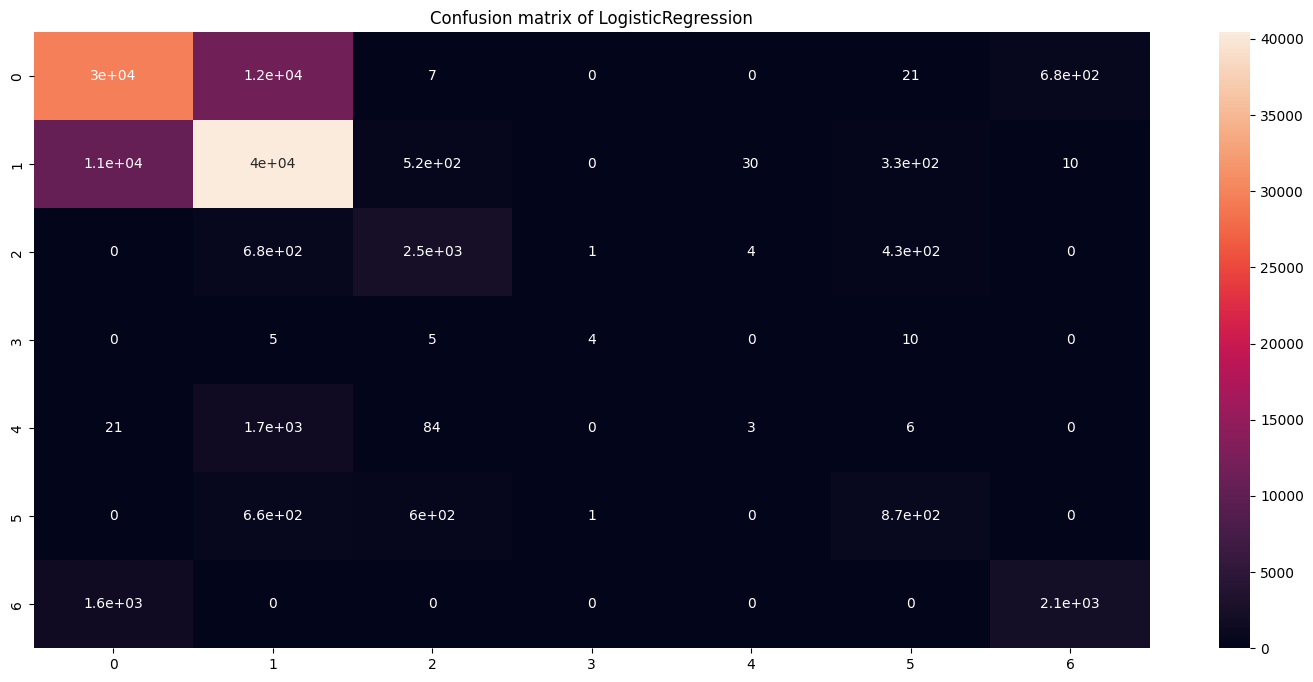

In [62]:
lreg_confusion = confusion_matrix(y_test, lreg_prediction)
fig, ax = plt.subplots(figsize=(18, 8))                                          # using matplotlib's plt with seaborn to set to change the size of the correlation matrix
plt.title("Confusion matrix of LogisticRegression")              # again using matplotlib's plt to display the title of the heatmap plot
sns.heatmap(lreg_confusion,annot = True)  # viridis, Spectral

In [63]:
model_and_their_scores_dict

{'k-NN': [0.928048513465914,
  0.07195148653408603,
  0.9277721258906565,
  0.8784005137076737],
 'Naive-Bayes': [0.5920813381186752,
  0.6475197829565373,
  0.6473205190559768,
  0.37791675633708627],
 'LogisticRegression': [0.7184962348752416,
  0.28150376512475844,
  0.7069191353540298,
  0.514875067338898]}

### 3.4 Decision Trees

To select the random forest with optimal attributes several random forest models will be evaluated.

In [64]:
d_model_acc=[]   # list to store model's accuracy on testing set
d_train_acc = []   # list to score model's accuracy on the training set

# a for loop to iterate over different depth paramters values to evaluate the accuracy and error of each instance, to be used to select the one that gives the least error
for depth in range(10,60,5):
    decison_tree  = DecisionTreeClassifier( max_depth=depth)
    decison_tree.fit(X_train, y_train)
    
    #appending model's error rate on training and testing set for every max_depth level
    d_model_acc.append(np.mean(y_test != decison_tree.predict(X_test)))
    d_train_acc.append(np.mean(y_train != decison_tree.predict(X_train)))

    print(depth)
    print("Accuracy on the training set is: ",accuracy_score(y_train, decison_tree.predict(X_train)))
    print("Accuracy on the testing set is: ",accuracy_score(y_test, decison_tree.predict(X_test)), '\n')

10
Accuracy on the training set is:  0.7828120636693661
Accuracy on the testing set is:  0.7699703930771208 

15
Accuracy on the training set is:  0.8712491432053007
Accuracy on the testing set is:  0.8368477671048999 

20
Accuracy on the training set is:  0.9415285217435455
Accuracy on the testing set is:  0.8802014413145093 

25
Accuracy on the training set is:  0.9814995811225915
Accuracy on the testing set is:  0.897042163685348 

30
Accuracy on the training set is:  0.9948274986672082
Accuracy on the testing set is:  0.8994697409632246 

35
Accuracy on the training set is:  0.9982292909547866
Accuracy on the testing set is:  0.9010500461715678 

40
Accuracy on the training set is:  0.9994192835926988
Accuracy on the testing set is:  0.9000694953495235 

45
Accuracy on the training set is:  0.9997651747861187
Accuracy on the testing set is:  0.900421732052588 

50
Accuracy on the training set is:  0.999904800588967
Accuracy on the testing set is:  0.9006311700922479 

55
Accuracy o

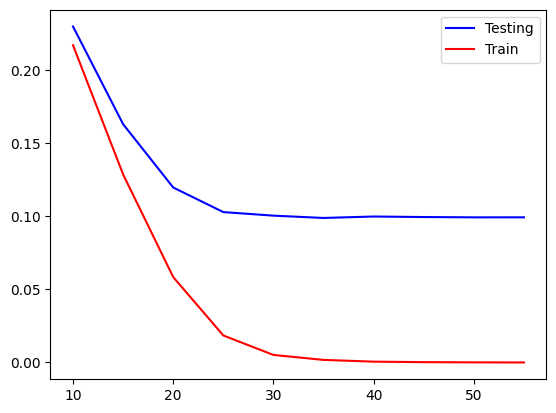

In [65]:
plt.plot(np.arange(10,60,5),d_model_acc, 'b', label = 'Testing')
plt.plot(np.arange(10,60,5), d_train_acc, 'r', label= 'Train')
plt.legend()

From the error metric on the training and testin set with verrying max_depth levels of the decision tree, it can be seen that after max_depth = 25, there is no significant increase, so we can will take the optimal depth as max_depth = 25.


In [66]:
decison_tree  = DecisionTreeClassifier( max_depth=30)
decison_tree.fit(X_train, y_train)
decision_tree_test_prediction = decison_tree.predict(X_test)

Evaluating the perfomrance of the decision tree model

In [67]:
dtree_accuracy_test = accuracy_score(y_test, decision_tree_test_prediction)
dtree_error_rate = np.mean(decision_tree_test_prediction != y_test)
dtree_precision = precision_score(y_test, decision_tree_test_prediction, average='weighted')    # weighted average is
dtree_mathew_corre_coeff = matthews_corrcoef(y_test, decision_tree_test_prediction)
model_and_their_scores_dict['DecisionTree'] = [dtree_accuracy_test, dtree_error_rate,  dtree_precision, dtree_mathew_corre_coeff]

The confusion matrix of decision tree model

<Axes: title={'center': 'Confusion matrix of DecisionTree'}>

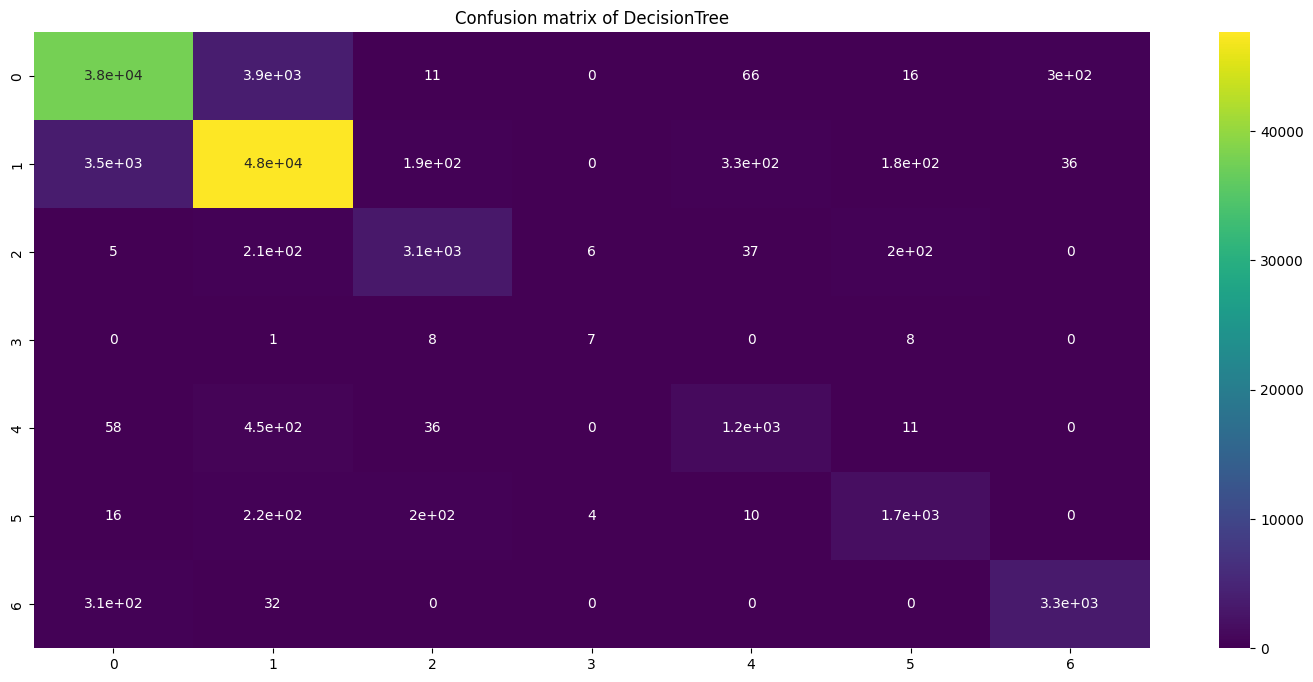

In [68]:
decision_confusion = confusion_matrix(y_test, decision_tree_test_prediction)
fig, ax = plt.subplots(figsize=(18, 8))                                          # using matplotlib's plt with seaborn to set to change the size of the correlation matrix
plt.title("Confusion matrix of DecisionTree")              # again using matplotlib's plt to display the title of the heatmap plot
sns.heatmap(decision_confusion,annot = True, cmap = 'viridis')  # viridis, Spectral

In [69]:
model_and_their_scores_dict

{'k-NN': [0.928048513465914,
  0.07195148653408603,
  0.9277721258906565,
  0.8784005137076737],
 'Naive-Bayes': [0.5920813381186752,
  0.6475197829565373,
  0.6473205190559768,
  0.37791675633708627],
 'LogisticRegression': [0.7184962348752416,
  0.28150376512475844,
  0.7069191353540298,
  0.514875067338898],
 'DecisionTree': [0.901097645726036,
  0.098902354273964,
  0.9008320021913866,
  0.8329501322236852]}

### 3.5 MLP

In the MLP and the other networks above we will utilise sklearn's implementation of GridSearchCV

The alpha value (L2) is going to be changed because our dataset is too large then the model is very likely to overfit, to prevent this a much higher value of alpha than the default value will be used.

In [71]:
mlp = MLPClassifier()
parameters = {'hidden_layer_sizes':[300, (100,300,150)], 'alpha': [0.00001, 0.01], 'learning_rate':['adaptive'] }

In [ ]:
_=mlp_grid_search = GridSearchCV(mlp, parameters)
_=mlp_grid_search.fit(X_train, y_train)

# to make sure the model doesn't overfit the accuracy on the training aset and testing set will be valuated
_=mlp_train_prediction = mlp_grid_search.predict(X_train)
_=mlp_test_prediction = mlp_grid_search.predict(X_test)

In [73]:
mlp_grid_search.best_params_

{'alpha': 1e-05,
 'hidden_layer_sizes': (100, 300, 150),
 'learning_rate': 'adaptive'}

Evaluation scores includes: error_rate, accuracy, precision, mathew_correlation-coefficient

In [74]:
mlp_accuracy_test = accuracy_score(y_test, mlp_test_prediction)
mlp_error_rate = np.mean(mlp_test_prediction != y_test)
mlp_precision = precision_score(y_test, mlp_test_prediction, average='weighted')    # weighted average is
mlp_mathew_corre_coeff = matthews_corrcoef(y_test, mlp_test_prediction)
model_and_their_scores_dict['MLP'] = [mlp_accuracy_test, mlp_error_rate,  mlp_precision, mlp_mathew_corre_coeff]
# 
print(f"The error of the MLP model on the training set is  is  {accuracy_score(y_train, mlp_train_prediction)}")
print(f"The error of the MLP model on the testing set is {mlp_accuracy_test}")

The error of the MLP model on the training set is  is  0.9828482394455587
The error of the MLP model on the testing set is 0.9567320049884334


<Axes: title={'center': 'Confusion matrix of MLP'}>

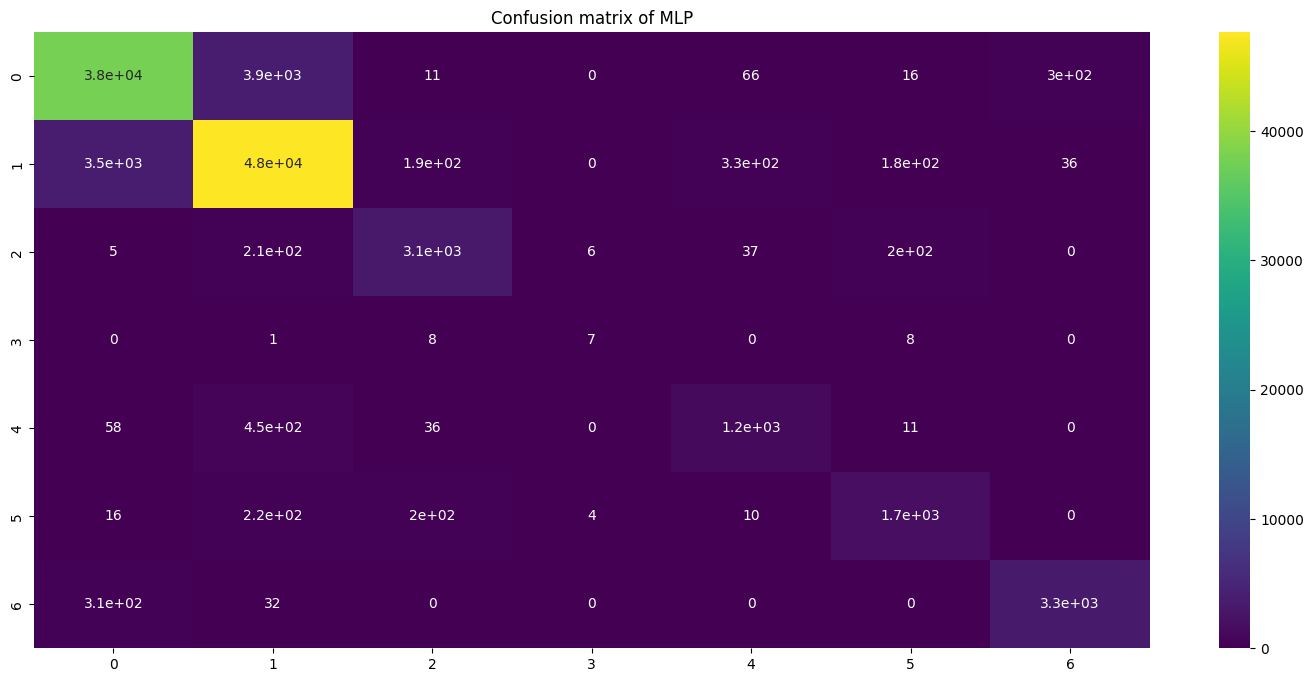

In [101]:
mlp_confusion = confusion_matrix(y_test, mlp_test_prediction)
fig, ax = plt.subplots(figsize=(18, 8))                                          # using matplotlib's plt with seaborn to set to change the size of the correlation matrix
plt.title("Confusion matrix of MLP")              # again using matplotlib's plt to display the title of the heatmap plot
sns.heatmap(decision_confusion,annot = True, cmap = 'viridis')  # viridis, Spectral

In [102]:
model_and_their_scores_dict

{'k-NN': [0.928048513465914,
  0.07195148653408603,
  0.9277721258906565,
  0.8784005137076737],
 'Naive-Bayes': [0.5920813381186752,
  0.6475197829565373,
  0.6473205190559768,
  0.37791675633708627],
 'LogisticRegression': [0.7184962348752416,
  0.28150376512475844,
  0.7069191353540298,
  0.514875067338898],
 'DecisionTree': [0.901097645726036,
  0.098902354273964,
  0.9008320021913866,
  0.8329501322236852],
 'MLP': [0.9567320049884334,
  0.04326799501156669,
  0.9567418351557624,
  0.9270206784160706]}

Comparing the perfomrance of all the models explored in this project

Accuracy plot

In [152]:
#Plotting the error of every model and their comparison
accuracy_values = []
error_values = []
precision_values =[]
mathews_values= []
models = []
for i in model_and_their_scores_dict:
    models.append(i)
    model_values = model_and_their_scores_dict[i]
    accuracy_values.append(model_values[0])
    error_values.append(model_values[1])
    precision_values.append(model_values[2])
    mathews_values.append(model_values[3])
    
    

Visualizing overall performance of all the models in terms of accuracy, precision and mathew's correlation coefficient. 

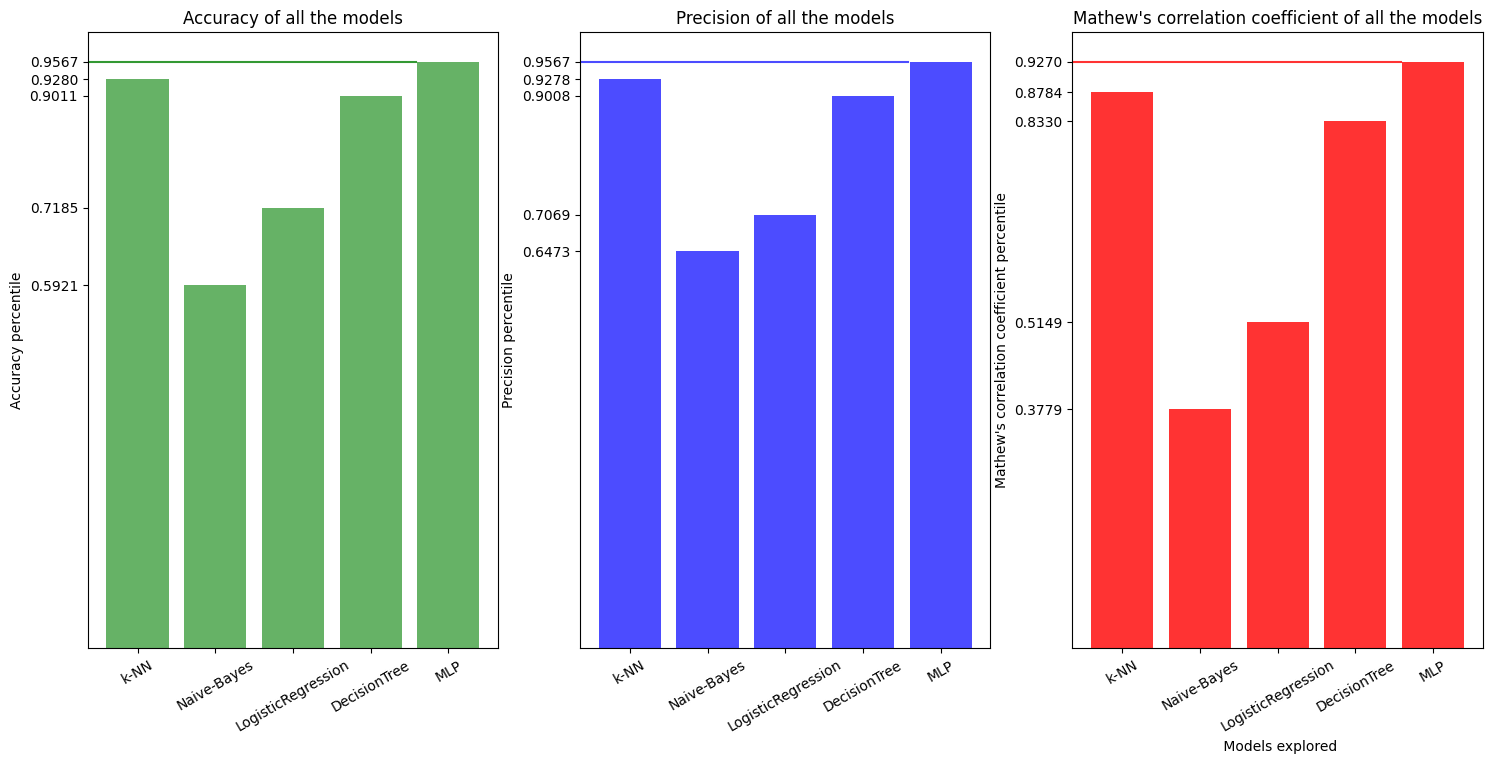

In [156]:
_=fig, ax = plt.subplots(1,3)
_=fig.set_size_inches(18,8)
_=plt.xlabel(" Models explored")

#accuracy plot
_=ax[0].bar(np.arange(len(model_and_their_scores_dict)), accuracy_values, alpha = 0.6, color = 'green')
_=ax[0].set_xticks( range(len(model_and_their_scores_dict)), list(model_and_their_scores_dict.keys()), rotation = 30)
_=ax[0].set_ylabel("Accuracy percentile")
_=ax[0].set_title("Accuracy of all the models")
_=ax[0].axhline(max(accuracy_values), xmin = 0, xmax = 0.8, color = 'green', alpha = 0.8)
_=ax[0].set_yticks(accuracy_values)


#precision plot
_=ax[1].bar(np.arange(len(model_and_their_scores_dict)), precision_values, alpha = 0.7, color = 'blue')
_=ax[1].set_xticks( range(len(model_and_their_scores_dict)), list(model_and_their_scores_dict.keys()), rotation = 30)
_=ax[1].set_ylabel("Precision percentile")
_=ax[1].set_title("Precision of all the models")
_=ax[1].axhline(max(precision_values), xmin = 0, xmax = 0.8, color = 'blue', alpha = 0.7)
_=ax[1].set_yticks(precision_values)


# mathew's correlation coefficient plot
_=ax[2].bar(np.arange(len(model_and_their_scores_dict)), mathews_values, alpha = 0.8, color = 'red')
_=ax[2].set_xticks( range(len(model_and_their_scores_dict)), list(model_and_their_scores_dict.keys()), rotation = 30)
_=ax[2].set_ylabel("Mathew's correlation coefficient percentile")
_=ax[2].set_title("Mathew's correlation coefficient of all the models")
_=ax[2].axhline(max(mathews_values), xmin = 0, xmax = 0.8, color = 'red', alpha = 0.8)
_=ax[2].set_yticks(mathews_values)


From the models_and_their_scores_dict it can be seen that: 


   -- MLP has the best perfomrance out of all the models 

      ---: Accuracy = 95.7%     Precision = 95.67%       Mathew's correlation coefficient = 92.7%

   -- Decistion trees has the second best performance in terms of precision, accuracy and mathew's correlation coeffiicent.
      
        ---: Accuracy = 90.10%       Precision = 90.10%       Mathew's correlation coefficient = 83.29.4% 


#### Comparison performance with state-of-the-art models:

 - Both the MLP and the DecisionTree models outperform the state-of-the-art models presented below:

![state-of-the-art](../Submissions/state-of-the-art.png)

### Thus, it can be seen that MLP with three hiden layers outperforms the state-of-the-art models' performance. 